In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eegbrain-signal-data/Files/MDD S28 TASK.edf
/kaggle/input/eegbrain-signal-data/Files/H S21 EO.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S11 EO.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S12 EO.edf
/kaggle/input/eegbrain-signal-data/Files/H S29 EC.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S17 TASK.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S15 TASK.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S30 EC.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S33 EC.edf
/kaggle/input/eegbrain-signal-data/Files/H S19 EC.edf
/kaggle/input/eegbrain-signal-data/Files/H S1 EC.edf
/kaggle/input/eegbrain-signal-data/Files/H S11 TASK.edf
/kaggle/input/eegbrain-signal-data/Files/H S21 EC.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S1 EC.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S34 EC.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S31 EO.edf
/kaggle/input/eegbrain-signal-data/Files/MDD S32 TASK.edf
/kaggle/input/eegbrain-signal-data/Files/H S28 TASK.

In [56]:
# Run these from the console if following along locally
!pip install mne


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [57]:
import  mne

In [58]:
# You'll want to comment this out if you plan on modifying this code, to get valuable feedback
import warnings
warnings.filterwarnings('ignore')

In [59]:

import mne

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.2)

In [60]:
input_fname='/kaggle/input/eegbrain-signal-data/Files/H S28 EC.edf'
# Load data as a MNE Raw file
#raw = mne.io.read_raw_fif('sub-02_mne_raw.fif', preload=True, verbose=0)
raw=mne.io.read_raw_edf(input_fname, eog=None, misc=None, stim_channel='auto', exclude=(), preload=True, verbose=0)

# Keep only the EEG channels
raw.pick_types(eeg=True)

# Apply a bandpass filter between 0.5 - 45 Hz
raw.filter(0.5, 45)

# Extract the data and convert from V to uV
data = raw._data * 1e6
sf = raw.info['sfreq']
chan = raw.ch_names

# Let's have a look at the data
print('Chan =', chan)
print('Sampling frequency =', sf, 'Hz')
print('Data shape =', data.shape)

Extracting EDF parameters from /kaggle/input/eegbrain-signal-data/Files/H S28 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1691 samples (6.605 sec)

Chan = ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'E

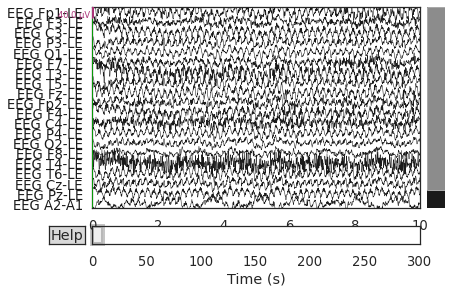

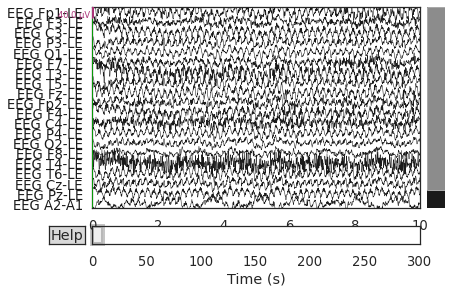

In [61]:
raw.plot() 

In [62]:
raw.get_data().shape # (channels, recordings) 

(22, 77056)

In [63]:
raw.get_data()[0] 

array([ 1.69406589e-21,  1.07055543e-05,  1.77991066e-05, ...,
       -7.21078135e-06, -5.98317551e-06,  6.12113653e-21])

# Reconstructed Data:

* ICA and dimensionality reduction
* 
* If you want to perform ICA with no dimensionality reduction (other than the number of Independent Components (ICs) given in n_components, and any subsequent exclusion of ICs you specify in ICA.exclude), pass max_pca_components=None and n_pca_components=None (these are the default values).
* 
* However, if you do want to reduce dimensionality, consider this example: if you have 300 sensor channels and you set max_pca_components=200, n_components=50 and n_pca_components=None, then the PCA step yields 200 PCs, the first 50 PCs are sent to the ICA algorithm (yielding 50 ICs), and during reconstruction apply() will use the 50 ICs plus PCs number 51-200 (the full PCA residual). If instead you specify n_pca_components=120 then apply() will reconstruct using the 50 ICs plus the first 70 PCs in the PCA residual (numbers 51-120).
* 
*  If you have previously been using EEGLAB’s runica() and are looking for the equivalent of its 'pca', n option to reduce dimensionality via PCA before the ICA step, set max_pca_components=n, while leaving n_components and n_pca_components at their default (i.e., None).

* We begin as always by importing the necessary Python modules and loading some example data. Because ICA can be computationally intense, we’ll also crop the data to 60 seconds; and to save ourselves from repeatedly typing mne.preprocessing we’ll directly import a few functions and classes from that submodule:

In [64]:
raw.crop(tmax=60.)

<RawEDF | H S28 EC.edf, 22 x 15361 (60.0 s), ~2.6 MB, data loaded>

In [65]:
ica = ICA(n_components=15, random_state=97)
ica.fit(raw)

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 15 components
Fitting ICA took 0.2s.


<ICA | raw data decomposition, fit (fastica): 15361 samples, 15 components, channels used: "eeg">

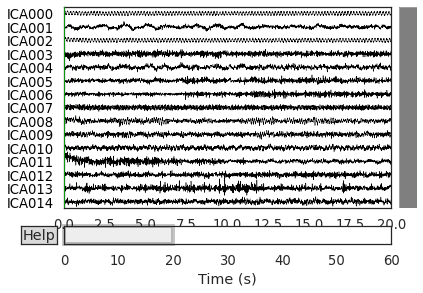

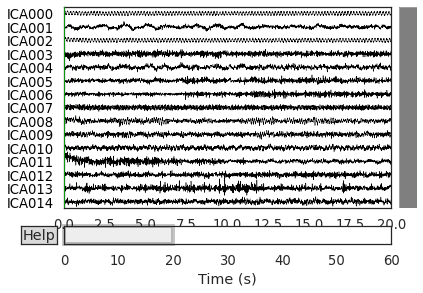

In [66]:
ica.plot_sources(raw)

Transforming to ICA space (15 components)
Zeroing out 1 ICA component


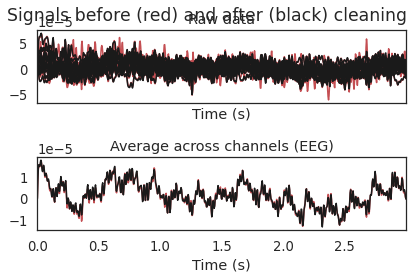

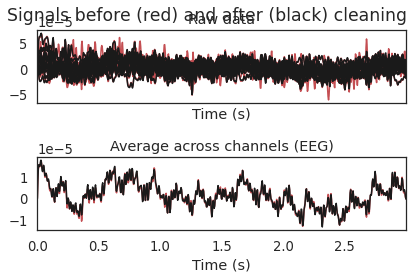

In [83]:
# blinks
ica.plot_overlay(raw, exclude=[3], picks='eeg')


In [ ]:
# blinks
ica.plot_overlay(raw, exclude=[0], picks='eeg')
